# DINOv3 Training Configuration Comparison

Compare multiple training configurations side-by-side:
- Loss component comparisons
- Learning rate schedules
- Training parameter evolution
- Performance summaries

This notebook provides an interactive way to analyze and compare your DINOv3 training runs.

In [12]:
# Import required libraries
import sys
sys.path.append('../utils')

from compare_training_configurations import ConfigurationComparator
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## Configuration Setup

Define the configurations you want to compare. Update the paths to match your training output directories.

In [ ]:
# Define configurations to compare
config_paths = {
    "seed 0": "/home/marjans/DinoV3LightningTraining/prototype_analysis_dinov3/pretraining/nctcrche100k/proto_4096/",
    # "sed 1": "/home/marjans/DinoV3LightningTraining/prototype_analysis_dinov3/classification/oxford_pets/proto_4096/seed_1/csv_logs/finetune_seed_1",
}

# Output directory for plots
output_dir = "training_comparison_plots"

print("Configurations to compare:")
for name, path in config_paths.items():
    print(f"  📁 {name}: {path}")

Configurations to compare:
  📁 seed 0: /home/marjans/DinoV3LightningTraining/prototype_analysis_dinov3/pretraining/eurosat/proto_4096/


## Load Training Data

Load the training metrics from all configurations.

In [14]:
# Create comparator and load data
comparator = ConfigurationComparator(config_paths, output_dir)

if comparator.load_all_data():
    print("\nAll training data loaded successfully!")
    print(f"Loaded {len(comparator.data)} configurations")
else:
    print("Failed to load training data. Check your paths.")

Loading training data for all configurations...
✅ Loaded seed 0: 21400 records

Successfully loaded 1/1 configurations

All training data loaded successfully!
Loaded 1 configurations


## 1. Total Loss Comparison

Compare the overall training progress across configurations.

Total loss comparison saved: training_comparison_plots/total_loss_comparison.png


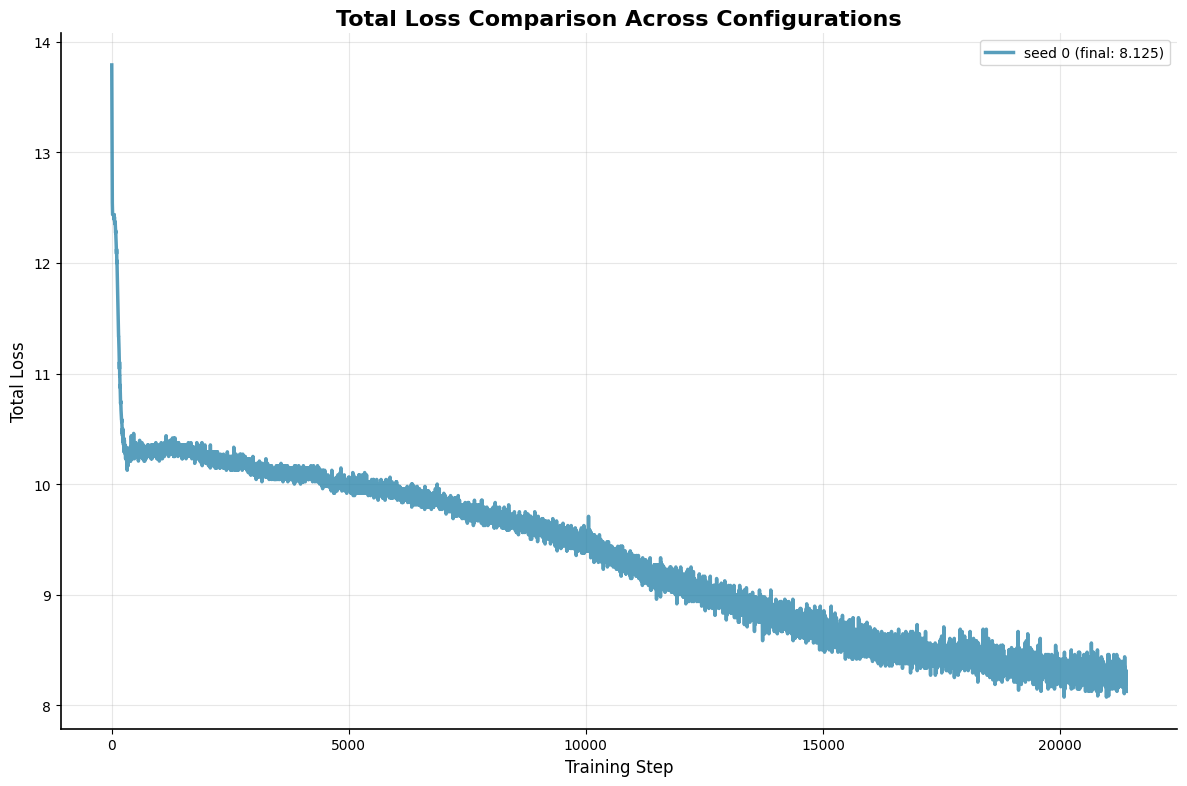

In [15]:
# Compare total losses
comparator.compare_total_losses()

## 2. DINO Loss Components

Compare DINO global and local crops losses.

DINO losses comparison saved: training_comparison_plots/dino_losses_comparison.png


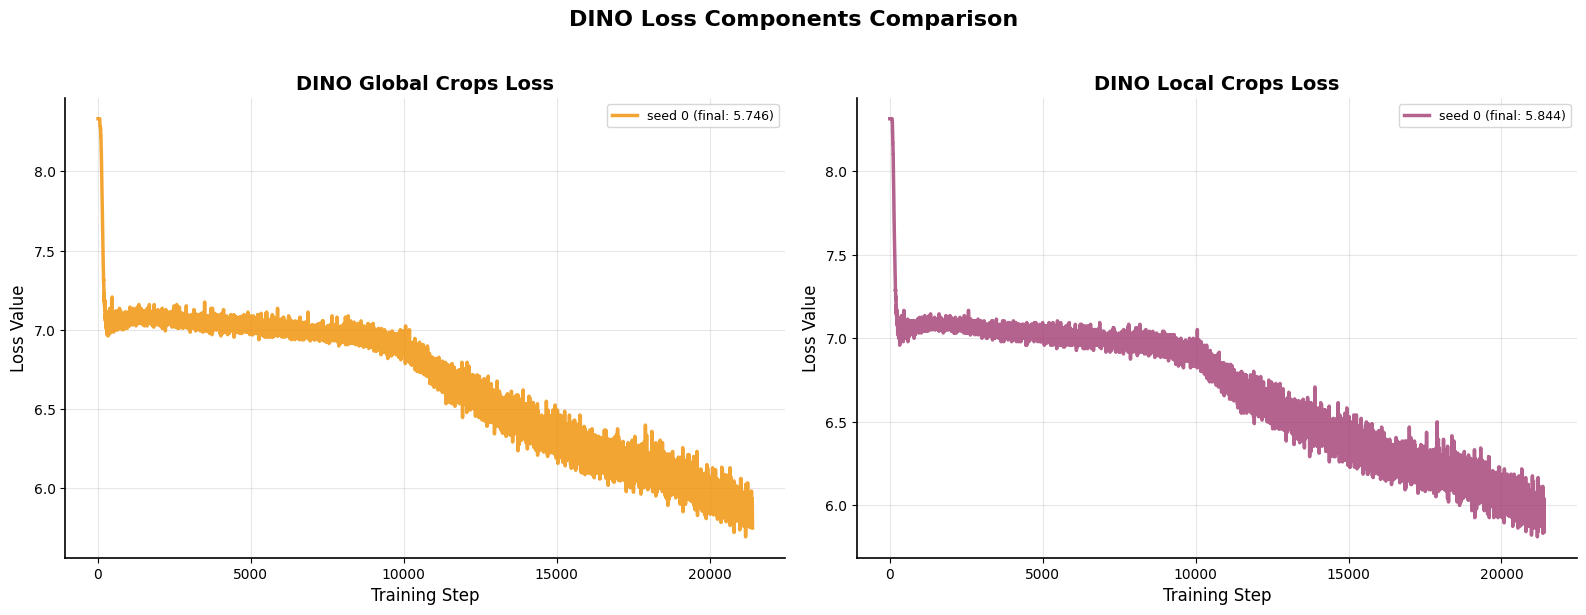

In [16]:
# Compare DINO loss components
comparator.compare_dino_losses()

## 3. iBOT, Koleo, and GRAM Losses

Compare auxiliary loss components.

iBOT and Koleo comparison saved: training_comparison_plots/ibot_koleo_comparison.png


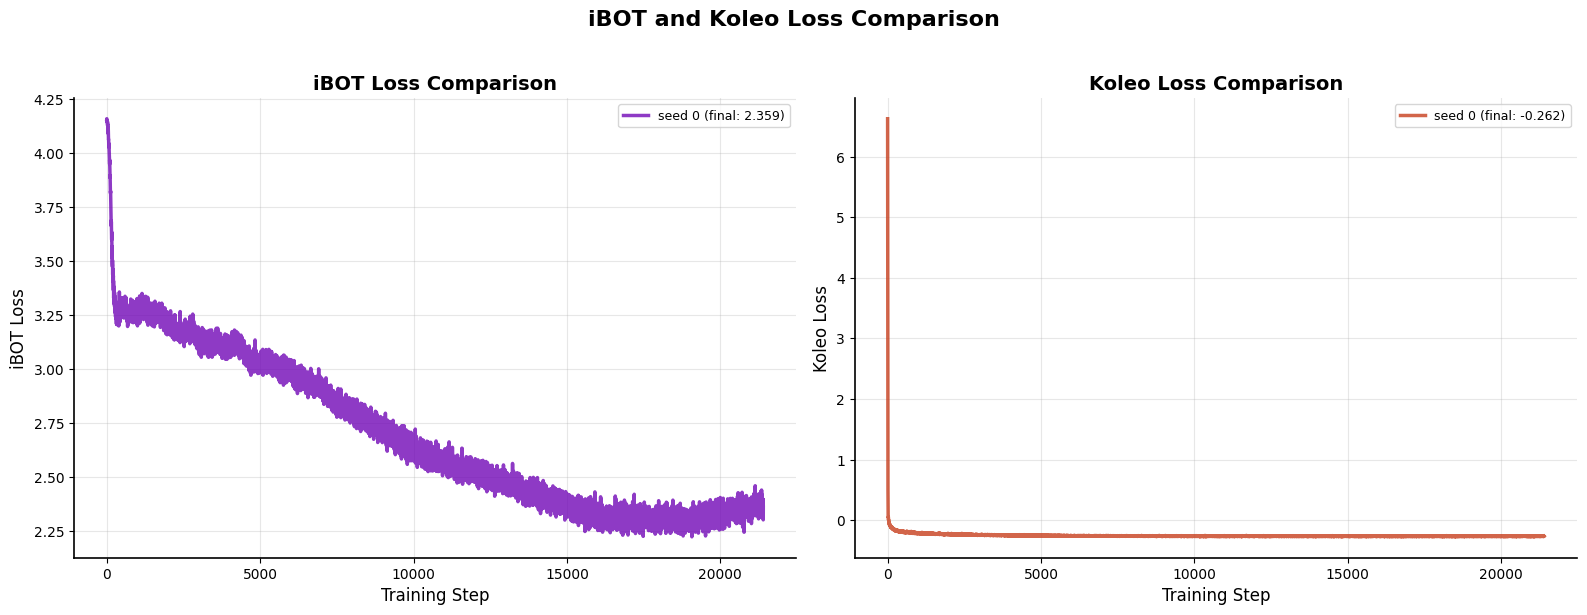

⚠️  No GRAM loss data found in any configuration
Auxiliary losses comparison saved: training_comparison_plots/auxiliary_losses_comparison.png


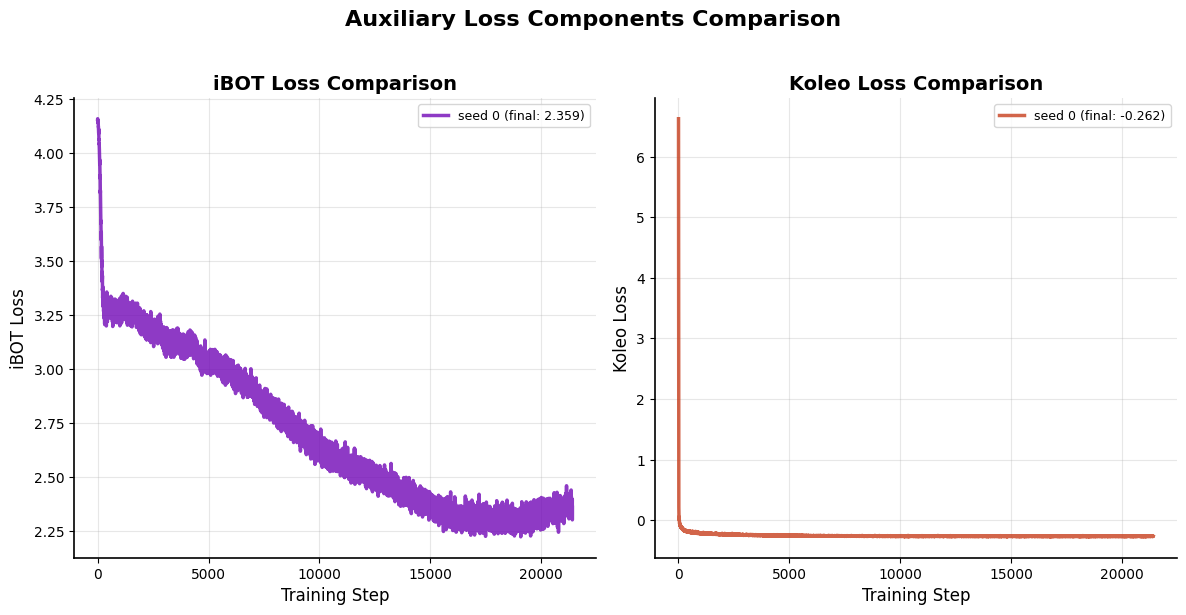

In [17]:
# Compare iBOT and Koleo losses (legacy view)
comparator.compare_ibot_koleo_losses()

# Compare GRAM loss (if available)
comparator.compare_gram_loss()

# Compare all auxiliary losses in comprehensive view
comparator.compare_auxiliary_losses()

## 4. Learning Rate Schedules

Compare learning rate evolution across configurations.

Learning rate comparison saved: training_comparison_plots/learning_rate_comparison.png


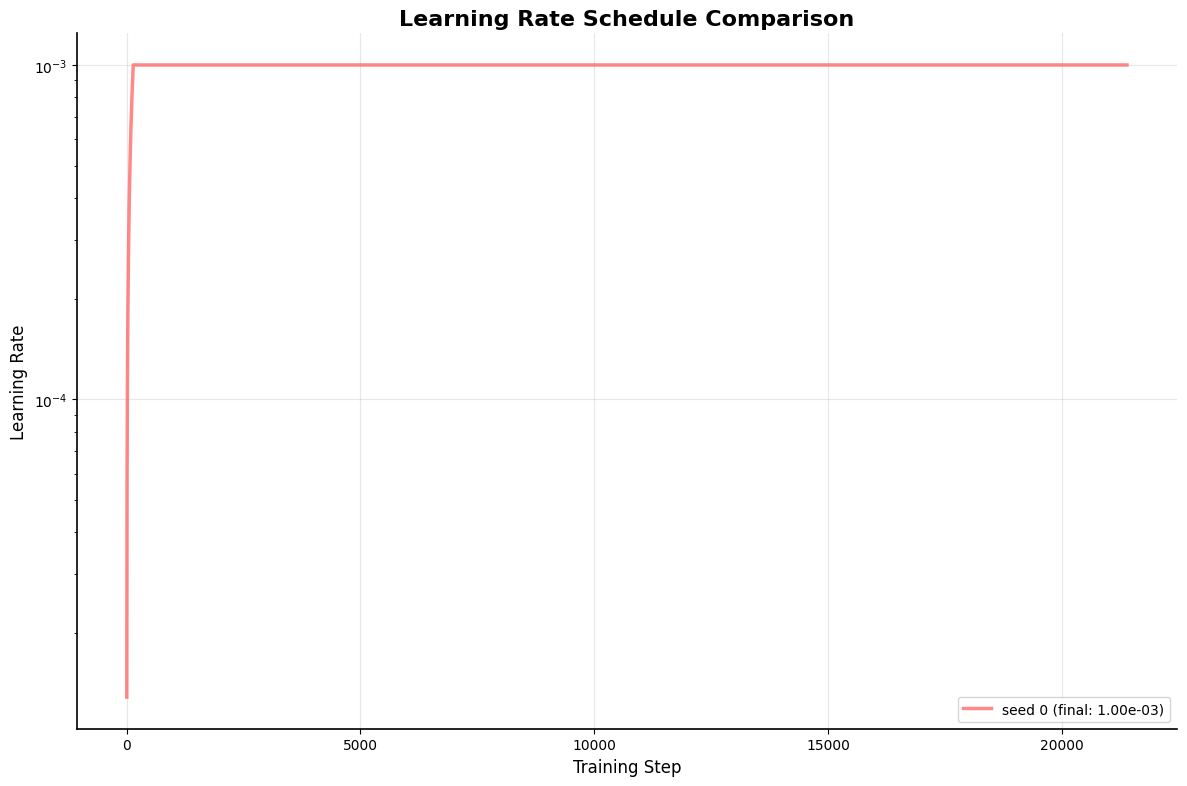

In [18]:
# Compare learning rate schedules
comparator.compare_learning_rates()

## 5. Performance Summary

Generate a comprehensive performance comparison table including GRAM loss (if available).

In [19]:
# Generate performance summary
comparator.generate_performance_summary()


CONFIGURATION PERFORMANCE COMPARISON
Configuration Final Total Loss Min Total Loss Final Global Loss Final Local Loss Final iBOT Loss  Training Steps Final LR
       seed 0           8.1250         8.0729            5.7460           5.8438          2.3593           21400 1.00e-03

Performance summary saved: training_comparison_plots/performance_summary.csv


## 6. Generate All Comparisons

Run all comparisons at once and save all plots including GRAM loss analysis.

Creating comprehensive configuration comparisons...
Total loss comparison saved: training_comparison_plots/total_loss_comparison.png


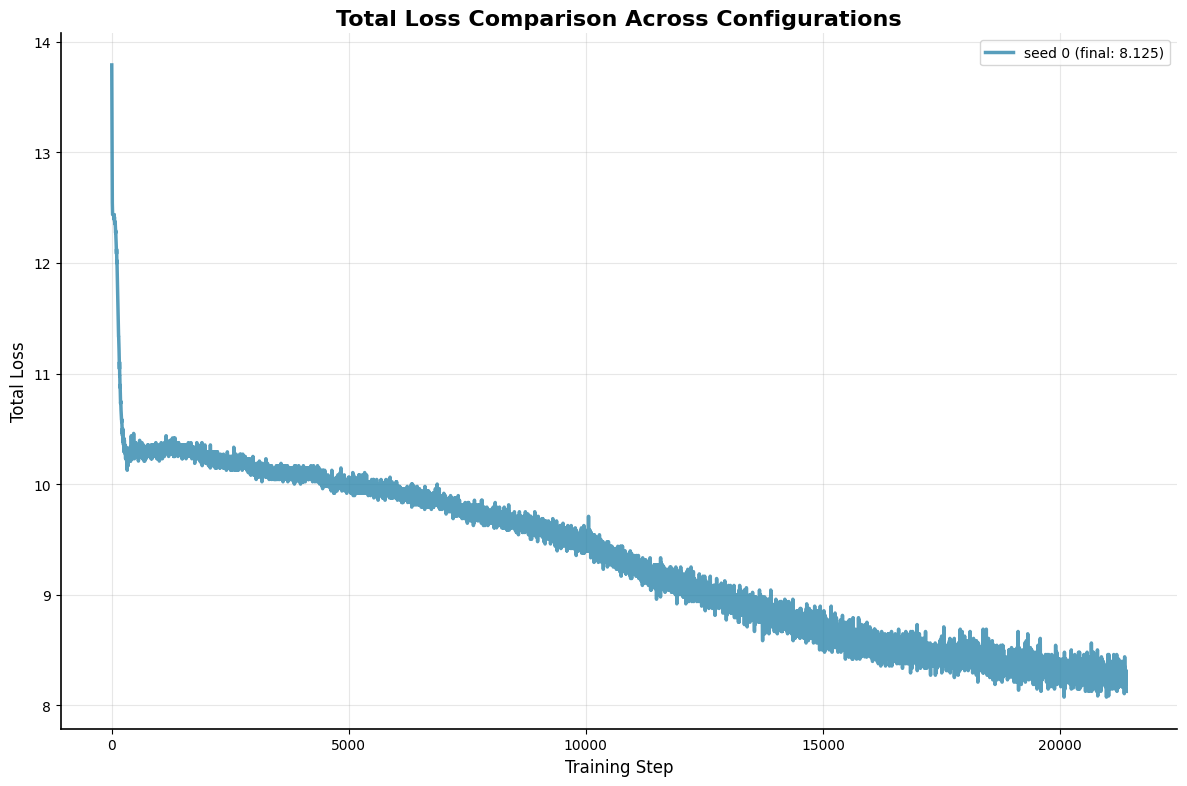

DINO losses comparison saved: training_comparison_plots/dino_losses_comparison.png


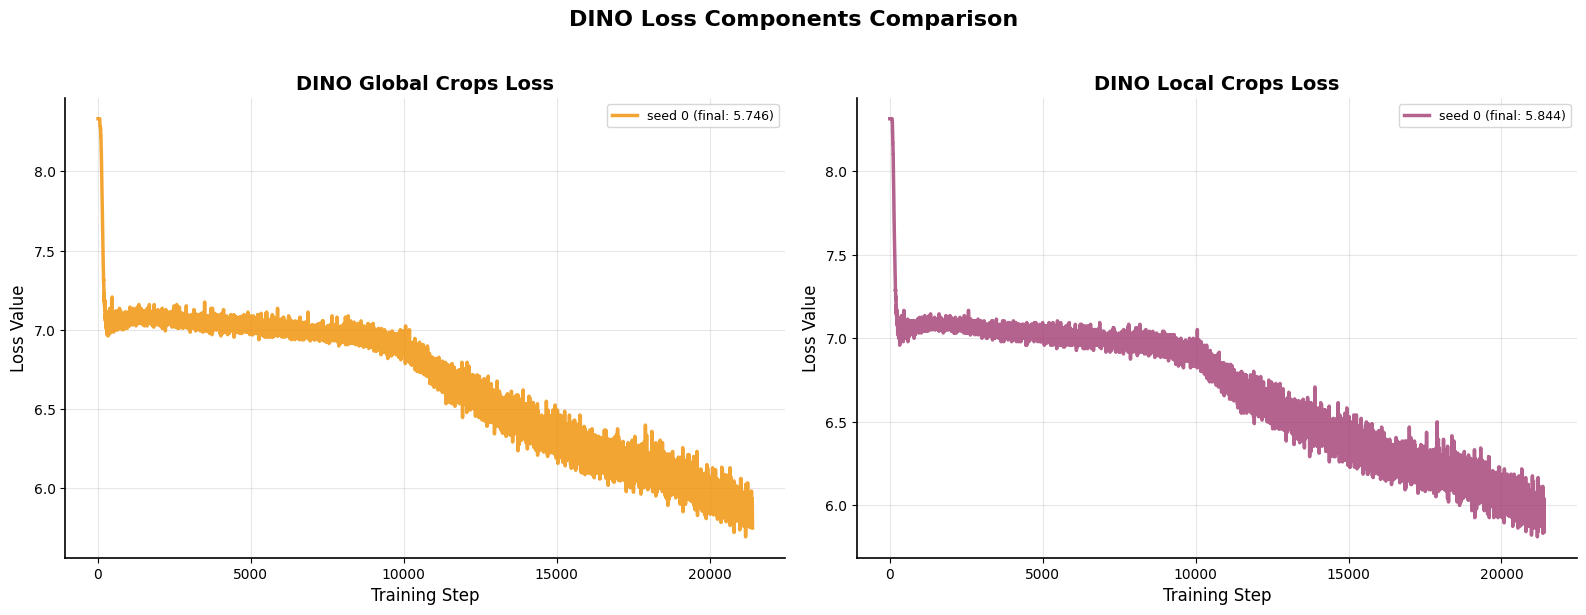

iBOT and Koleo comparison saved: training_comparison_plots/ibot_koleo_comparison.png


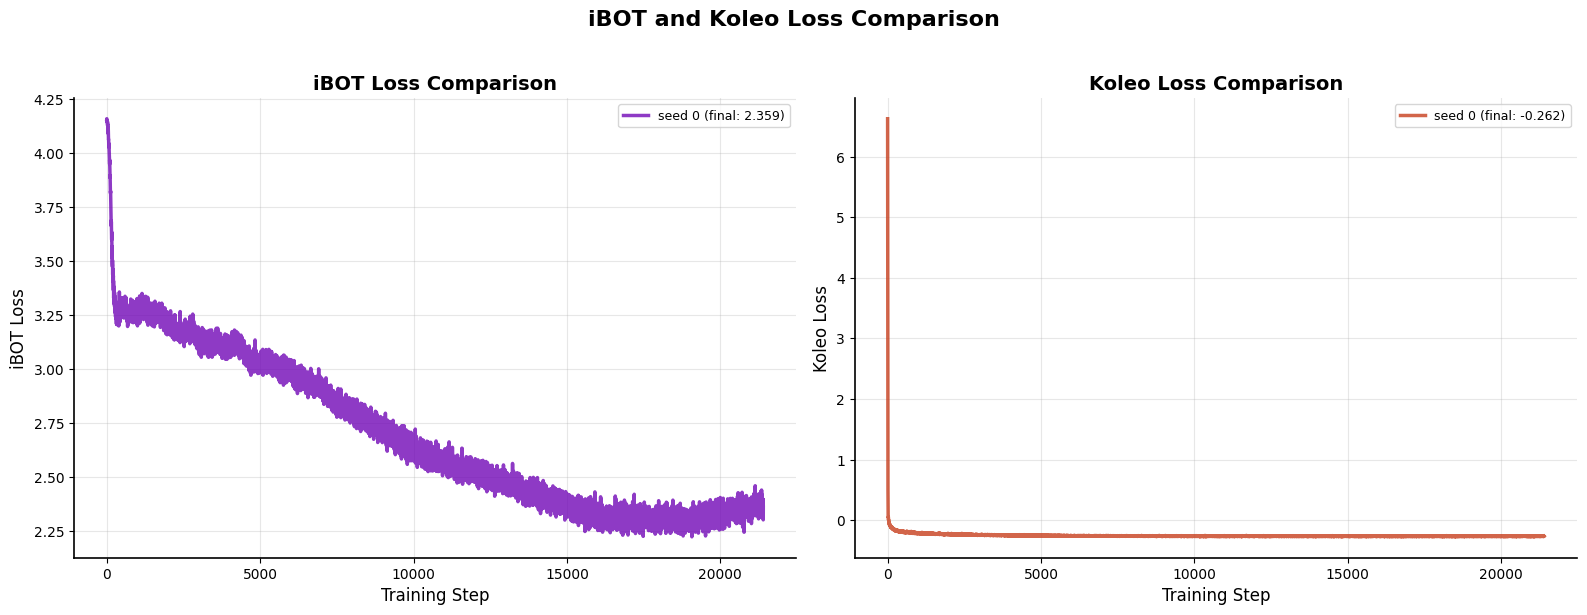

⚠️  No GRAM loss data found in any configuration
Auxiliary losses comparison saved: training_comparison_plots/auxiliary_losses_comparison.png


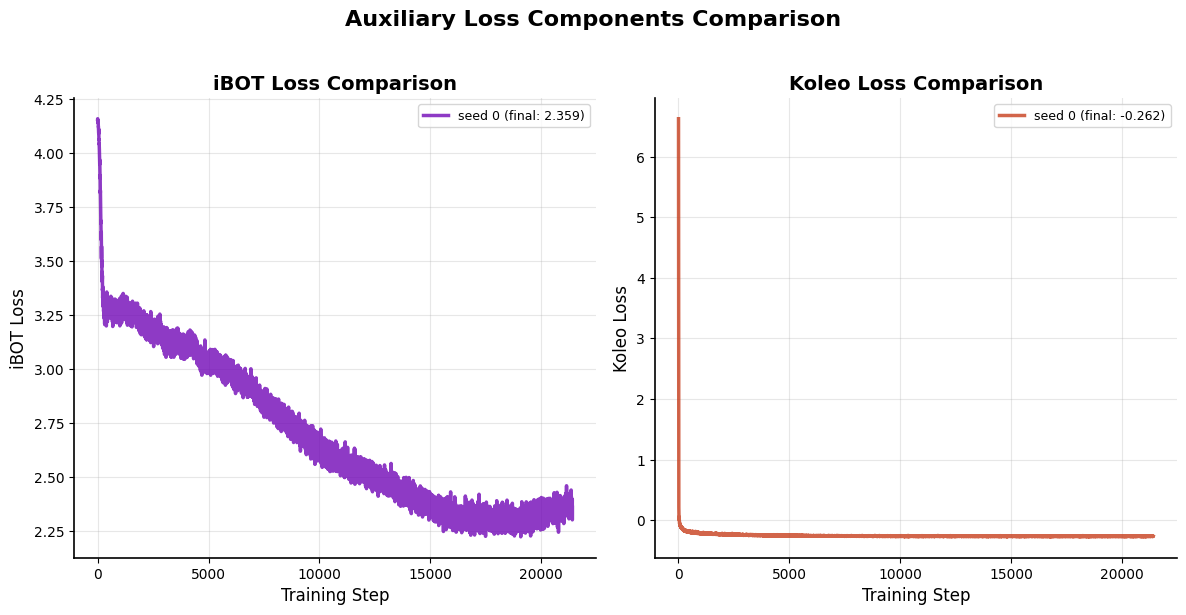

Learning rate comparison saved: training_comparison_plots/learning_rate_comparison.png


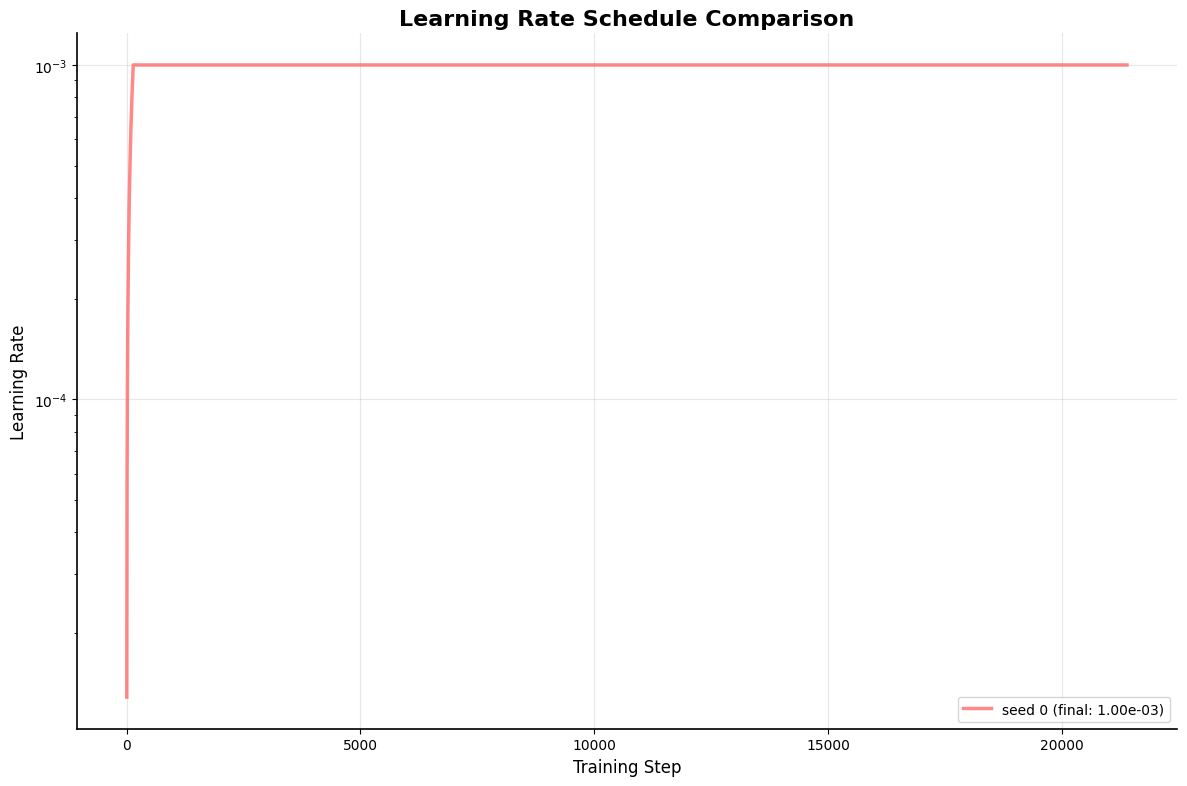


CONFIGURATION PERFORMANCE COMPARISON
Configuration Final Total Loss Min Total Loss Final Global Loss Final Local Loss Final iBOT Loss  Training Steps Final LR
       seed 0           8.1250         8.0729            5.7460           5.8438          2.3593           21400 1.00e-03

Performance summary saved: training_comparison_plots/performance_summary.csv

All comparison plots saved to: training_comparison_plots


In [20]:
# Generate all comparisons at once
comparator.create_all_comparisons()

## Custom Configuration Example

Example of how to compare custom configurations:

In [21]:
# Example: Compare 3 different experiments
# Uncomment and modify paths as needed

# custom_configs = {
#     "experiment_1": "../output_exp1",
#     "experiment_2": "../output_exp2",
#     "experiment_3": "../output_exp3"
# }

# custom_comparator = ConfigurationComparator(custom_configs, "custom_comparison")
# if custom_comparator.load_all_data():
#     custom_comparator.create_all_comparisons()

## Individual Metric Analysis

Access individual metrics for custom analysis:

In [22]:
# Access individual configuration data
if comparator.data:
    for config_name, df in comparator.data.items():
        print(f"\n{config_name} Statistics:")
        print(f"Training steps: {len(df)}")
        
        if 'total_loss' in df.columns:
            total_loss = df['total_loss'].dropna()
            print(f"Final total loss: {total_loss.iloc[-1]:.4f}")
            print(f"Best total loss: {total_loss.min():.4f}")

        if 'train/gram_loss' in df.columns:
            gram_loss = df['train/gram_loss'].dropna()
            print(f"Final GRAM loss: {gram_loss.iloc[-1]:.4f}")
            print(f"Best GRAM loss: {gram_loss.min():.4f}")
            
        if 'train/lr' in df.columns:
            lr = df['train/lr'].dropna()
            print(f"Final learning rate: {lr.iloc[-1]:.2e}")


seed 0 Statistics:
Training steps: 21400
Final total loss: 8.1250
Best total loss: 8.0729
Final learning rate: 1.00e-03


## Results Summary

🎉 **All comparison plots and summaries have been generated!**

**Generated files:**
- `total_loss_comparison.png` - Overall training progress
- `dino_losses_comparison.png` - DINO loss components  
- `ibot_koleo_comparison.png` - iBOT and Koleo losses (legacy view)
- `gram_loss_comparison.png` - GRAM loss evolution (if available)
- `auxiliary_losses_comparison.png` - Comprehensive auxiliary losses view
- `learning_rate_comparison.png` - LR schedules
- `performance_summary.csv` - Numerical comparison including GRAM metrics

All plots are saved in the `training_comparison_plots/` directory.

### GRAM Loss Support

The comparison tool now automatically detects and includes GRAM loss in:
- ✅ Individual GRAM loss plots
- ✅ Comprehensive auxiliary loss comparisons  
- ✅ Performance summary tables
- ✅ Individual configuration statistics

If GRAM loss data is not available in your configurations, those sections will be skipped automatically.